In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [116]:
# Loading Energy Dataset
df = pd.read_csv("./dataset/energy_production_filtered.csv")

In [117]:
df.shape

(1000, 2)

In [118]:
 
X = df[['Time of Day (Hours from Sunrise)']].values
y = df['Energy Production (kWh)'].values

# Degrees of polynomial to test
degrees = [1, 2, 4, 6, 8, 10, 12,14]

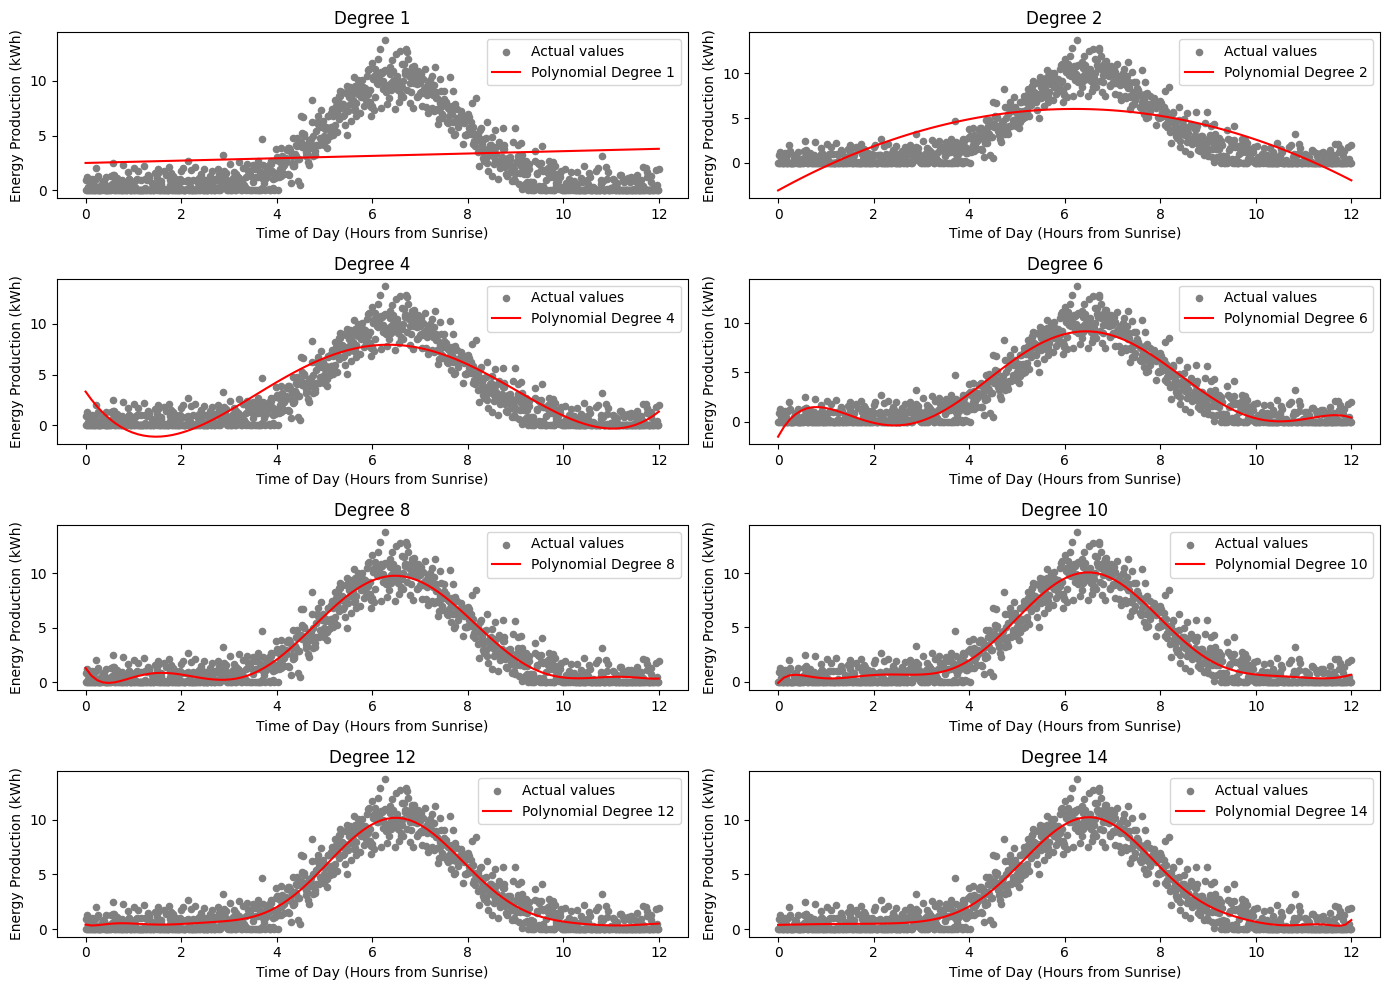

,Degree,MSE,R^2
0,1,13.076019,0.011485
1,2,6.598612,0.501161
2,4,2.863460,0.783529
3,6,1.454774,0.890023
4,8,1.052623,0.920424
5,10,0.997234,0.924612
6,12,0.988685,0.925258
7,14,0.998683,0.924502


In [119]:
# Prepare subplot configuration
plt.figure(figsize=(14, 10))
columns = 2
rows = (len(degrees) + 1) // 2

# Store errors for analysis
errors = []

for i, degree in enumerate(degrees):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate errors
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    errors.append({'Degree': degree, 'MSE': mse, 'R^2': r2})
    
    # Sort test data for plotting
    X_axis = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_axis_poly = poly_features.transform(X_axis)
    y_axis_pred = model.predict(X_axis_poly)
    
    plt.subplot(rows, columns, i+1)
    plt.scatter(X, y, color='gray', s=20, label='Actual values')
    plt.plot(X_axis, y_axis_pred, color='red', label='Polynomial Degree ' + str(degree))
    plt.title('Degree ' + str(degree))
    plt.xlabel('Time of Day (Hours from Sunrise)')
    plt.ylabel('Energy Production (kWh)')
    plt.legend()

plt.tight_layout()
plt.show()

# Display errors in a DataFrame for analysis
errors_df = pd.DataFrame(errors)
errors_df.head(8)

Given the table above, selecting a polynomial degree of 8 might be the most practical choice. It strikes a balance between model complexity and the ability to generalize, as indicated by a relatively low MSE and a high $R^2$ value. With higher polynomial degrees model, the improvement is relatively small and doesn't justify the added complexity in the model and the risk of overfitting.
